### * 지도학습

#### - Logistic Regression 
            - 주요 매개변수(Hyperparameter)
            - LogisticRegression(C, max_iter)
            - 규제 강도의 역수: C  (=> 값이 작을수록 규제가 강해짐)
            - 최대 반복횟수 : max_iter (=> 값을 크게 잡아 주어야 학습이 제대로 됨)
            - 기본적으로 L2규제 사용, 중요한 특성이 몇 개 없다면 L1규제를 사용해도 무방.  ( => 주요 특성을 알고 싶을 떄는 L1규제를 사용하기도 함)
#### - 선형 모델 방식을 분류에서 사용하는 이유?
            - 선형 모델은 간단한 함수식을 사용하므로 학습 및 예측 속도가 빠름
            - 매우 큰 데이터 세트와 희소(sparse)한 데이터 세트에서도 잘 동작
            - 특성이 많을 수록 더 잘 동작함.
            - 특성이 작은 데이터에서는 다른 모델이 더 좋은 경우가 많음.

#### < 문제 정의 >
    - 손글씨 숫자(0~9)를 분류하는 모델을 만들어보자.
    - 이미지 데이터의 형태를 이해해보자.
#### < 데이터 수집>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
#데이터 가져오기
data = pd.read_csv("./data/digit_train.csv")

In [26]:
data.shape

(42000, 785)

In [27]:
data.head()
# label: 정답
# pixel10 ~ pixel783 : 문제(28*28 이미지 데이터)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# 데이터 시각화 --> 이미지 데이터로 첫번째 행의 label컬럼을 제외한 모든 컬럼 가져오기.
image0 = data.iloc[0, 1:]
image0.shape

(784,)

In [29]:
image0.values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [30]:
# 리스트 자료형을 28*28의 2차원으로 변환
image0_reshape= image0.values.reshape(28,28)

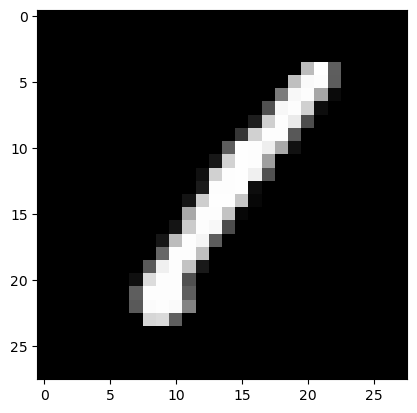

In [31]:
# image0 이미지 하나를 그려보기.
plt.imshow(image0_reshape, cmap='gray' )

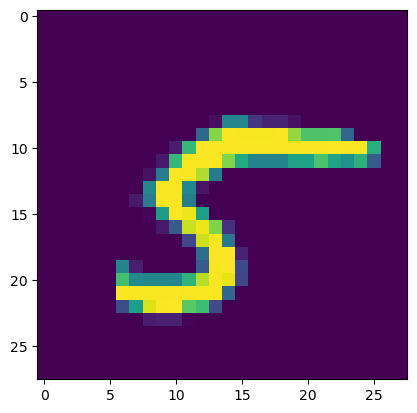

In [32]:
# 7777 행의 데이터 꺼내와서 1. 값 확인 2. 2차원 변환 3. 이미지 그려보기.  4. 어떤 숫자인지 확인.
img1= data.iloc[7777,1:]
img1_reshape= img1.values.reshape(28,28)
plt.imshow(img1_reshape)

## Linear SVM(Support vector machines)
- 두 집단을 결정 경계 : 초평면(hyperplane)
- 두 집단의 초평면에서 가장 가까운 데이터; 서포트 벡터(SV)
- sv와 초평면과의 거리 : 마진.
- 마진이 가장 큰 값: 잘되었다.
- 규제강도 :C (값이 작을수록 규제가 강해짐)
- 기본적으로 L2(릿지?)규제를 사용, 랏소?(-> L1) 중요한 특성이 몇개 없다면 L1규제를 사용해도 무방,

### 학습을 위한 데이터 분리
- 학습 7: 테스트 3
- random_state : 7

In [33]:
X= data.iloc[:,1:] # 문제
y=data.iloc[:,0] # 답

In [34]:
X.shape, y.shape # 문제는 항상 2차원 데이터 프레임 형태(=> [[ ]] ), 정답은 1차원 시리즈 형태임. 

((42000, 784), (42000,))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state =7)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29400, 784)
(12600, 784)
(29400,)
(12600,)


### 모델 선택
- KNN모델(거리로 계산)
- Logistic Regression
- SVM

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# 모델 생성
knn_model = KNeighborsClassifier()
logi_model =LogisticRegression()
svm_model= LinearSVC()

### 학습 및 평가

In [38]:
# 학습
knn_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

#평가
print('KNN : ', knn_model.score(X_test,y_test))
print('Logistic : ', logi_model.score(X_test,y_test))
print('SVM : ', svm_model.score(X_test,y_test))

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN :  0.9645238095238096
Logistic :  0.9138095238095238
SVM :  0.8452380952380952


### 데이터 스케일링 적용
- 이미지 픽셀정보 : 0부터 225로 최소/최대가 고정되어있는 데이터
- MinMAxScaler를 사용하려면 0과 1사이의 값으로 모든 픽셀을 조정.
 - 스케일링의 효과 확인하기
     - 학습(연산) 속도 개선
     - 거리기반으로 예측하는 KNN모델이 변화가 있는지
- KNN모델 : 모든 데이터의 대한 거리를 계산, 데이터가 많을 수록 속도가 느려짐.

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler() # 0 ~ 1 사이로 변환.

In [41]:
scaler.fit( X_train) # 현재 데이터 분포의 최소/최대 값 확인
                     # 변환하는 기준 값을 X_train으로 추출.

MinMaxScaler()

In [42]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13927,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38467,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# 문제 데이터에 스케일링 적용
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [44]:
# 스케일링이 적용된 데이터로 다시 학습
knn_model.fit(X_train_scale, y_train)
logi_model.fit(X_train_scale, y_train)
svm_model.fit(X_train_scale, y_train)

# 스케일링이 적용된 데이터로 변화값 확인
print('KNN : ', knn_model.score(X_test_scale,y_test))
print('Logistic : ', logi_model.score(X_test_scale,y_test))
print('SVM : ', svm_model.score(X_test_scale,y_test))

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNN :  0.9644444444444444
Logistic :  0.9169047619047619
SVM :  0.908968253968254


## - 회귀 : 정답이 연속적인 수치값, y햇이 예측한 값을 그대로 사용
## - 분류 :  정답이 딱 떨어지는 정해져있는 값.
### 선형 분류 : y햇이라는 선형함수(결정경계)를 기준으로 결정경계의 위쪽에 있느냐, 아래쪽에 있느냐로 영역을 예측 하는 것. 가중치들의 합 > 0 ==> 1
### 가중치들의 합 < 0 ==> 0

## Logistic Regression
- 결정경계가 S자형 곡선으로 그려짐.
- Sigmoid(s자형 곡선) 이라는 선형함수를 사용
- Sigmoid는 입력값을  0 ~ 1 범위로 변환, 확률값으로 사용
  ex) 개와 고양이를 분류하는 모델 : 개(70%), 고양이(80%) ==> 예측하는 확률값을 명시
- Sigmoid 함수(곡선)를 잘 그렸는지 확인하는 기준 ==> 교차엔트로피 오차함수
  - 오차들을 더해서 오차가 크면 ==> 안 좋은 함수
  - 오차들을 더해서 오차가 작으면 ==> 좋은 함수
  
- 선형회귀 --> MSE, R2score(직선)
- 로지스틱회귀 --> 교차엔트로피 오차함수(곡선)

SVM --> 마진

SVM
- 결정경계(초평면)와 가장 인접한 데이터 : 서포트 벡터
- 결정경계(초평면)와 서포트 벡터간의 거리 : 마진
- 마진이 가장 큰 결정경계가 가장 좋은 결정경계 !
- 결정경계(초평면)가 데이터(N)가 가지고 있는 차원(N-1)으로 구성함.

### 분류 평가 지표 - 이진 분류
![image.png](attachment:image.png)

### 정확도(Accuracy)
#### : 정확히 예측한 수를 전체 샘플 수로 나눈 것.
![image.png](attachment:image.png)

### 재현율(Recall)
#### : 전체 양성 샘플 중에서 얼마나 많은 샘플이 양성 클래스로 분류되는가.
![image-2.png](attachment:image-2.png)

### 정밀도(Precision)
#### : 양성으로 예측된 것 중 얼마나 많은 샘플이 진짜 양성인지 측정하는 것
![image-3.png](attachment:image-3.png)

### F1-score
#### : 정밀도와 재현율의 조화 평균
![image-4.png](attachment:image-4.png)

### 평가지표
- 회귀 : 오차를 기반으로 하는 평가지표 사용(MSE, R2score)
- 분류 : 맞춘 개수를 기반으로 평가지표를 사용.
          1. 정확도(Accuracy) : 전체 데이터 중에서 정확히 맞춘 비율
          2. 재현율(Recall) : 실제 양성중에서 정확히 맞춘 비율
          3. 정밀도(Precision) : 예측한 양성 중에서 정확히 맞춘 비율
          4. F1 score : 정밀도와 재현율의 조화 평균
- SVM : 초평면(결정경계)을 기준으로 소프트벡터의 마진(거리)이 클수록 좋은 결정경계

In [45]:
# 평가지표 라이브러리 불러오기
from sklearn.metrics import confusion_matrix

In [51]:
# 스케일링이 적용된 테스트 데이터로 예측 값 만들기.
# 로지스틱 분류 사용
pre = logi_model.predict(X_test_scale)

In [52]:
test_conf = confusion_matrix(y_test, pre)
test_conf

array([[1207,    0,    4,    4,    3,   13,    6,    3,    7,    2],
       [   0, 1406,    7,    7,    1,    4,    1,    2,    8,    4],
       [   7,   11, 1112,   23,   15,    3,   11,   19,   22,    8],
       [   7,    2,   39, 1152,    1,   46,    1,   11,   28,   12],
       [   3,   18,   10,    2, 1140,    1,   13,   10,    9,   44],
       [  11,    7,   16,   41,   15,  936,   17,    7,   29,    9],
       [  13,    4,    8,    1,   16,   16, 1157,    1,    7,    2],
       [   1,   11,   13,    4,    7,    1,    2, 1216,    3,   48],
       [   9,   38,    8,   36,    9,   27,    6,    1, 1089,   24],
       [   8,    8,    2,   10,   36,    8,    0,   44,   11, 1138]],
      dtype=int64)

In [53]:
from sklearn.metrics import classification_report
# classification_report : 분류 평가지표 4가지를 report 형태로 출력.

In [56]:
# classification_report(실제값, 예측값)
print(classification_report(y_test, pre))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1249
           1       0.93      0.98      0.95      1440
           2       0.91      0.90      0.91      1231
           3       0.90      0.89      0.89      1299
           4       0.92      0.91      0.91      1250
           5       0.89      0.86      0.87      1088
           6       0.95      0.94      0.95      1225
           7       0.93      0.93      0.93      1306
           8       0.90      0.87      0.89      1247
           9       0.88      0.90      0.89      1265

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600



- support : 데이터의 갯수
- accuracy : 로지스틱 회귀의 예측성능 92% 이지만, 각 숫자(클래스)가 나올 확률의 수치 값은 다름.
- f1-score : 정밀도와 재현율의 조화 평균  ➜ 정밀도와 재현율을 고려한 수치값.
            ➜ 수치가 높은게 두 분류지표(정밀도, 재현율)도 높음을 알 수 있음.
- macro avg : 정밀도, 재현율, f-1 score를 구해서 각각 평균을 낸 것.
             ➜ 분류하는 모델이 각 클래스에 대해 얼마나 평균적으로 잘 동작하는지 알고 싶을 떄 사용.
- weighted avg(가중 평균): 각 클래스의 중요도, 영향도(빈도)등에 따라 가중치를 곱해서 구해지는 평균 값.

### 예측

In [58]:
# index 7번쨰 데이터 가져오기.
img7 = X_test_scale[7]

In [59]:
logi_model.predict([img7])

array([1], dtype=int64)

In [60]:
# 실제 정답 확인
y_test.iloc[7]

1

In [61]:
svm_model.predict([img7])

array([1], dtype=int64)

In [63]:
# 7번째 값(0~9)숫자가 1일 확률
logi_model.predict_proba(X_test_scale[7:8])
# svm은 predict_proba 없음.

array([[3.73323833e-10, 9.88049149e-01, 2.75926406e-04, 3.35151433e-03,
        2.15892443e-06, 7.28083512e-05, 1.06545842e-05, 6.20899060e-03,
        1.35662821e-04, 1.89313425e-03]])

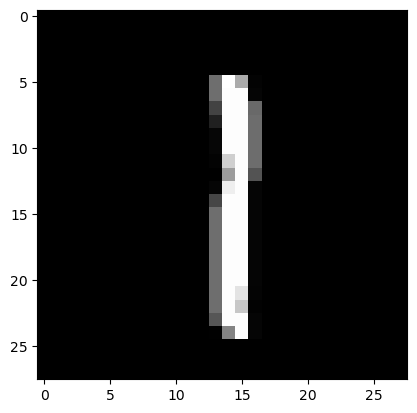

In [66]:
img7 =X_test.iloc[7]
plt.imshow(img7.values.reshape(28,28), cmap='gray')

## 분류평가 지표
- 낮은 재현율 , 높은 정밀도를 선호하는 경우
  - 어린아이에게 안전한 동영상(양성)을 걸러내는 분류기를 훈련시킬 경우 좋은 동영상이 많이 제외되더라도(낮은 재현율) 안전한 것들만 노출시키는(높은 정밀도) 분류기가 더 좋음 ( 의학실험, 모델이 예측의 리스크, 비용이 큰 경우에 적합)
- 높은 재현율, 낮은 정밀도를 선호하는 경우
  - 감시카메라로 좀도둑(양성)을 잡아내는 분류기를 훈련시킬 경우 경비원이 잘못된 호출을 종종 받지만(낮은 정밀도) 거의 모든 좀도둑을 잡는(높은 재현율) 분류기가 더 좋음. 암환자 판정, 스팸 문자 및 메일 분류 ( 실제 사건(상황)에 대한 리스크가 큰 경우에 적합)
- 같은 정확도 일 때, 애매한 것들을 사용하지 않겠다. ==> 높은 정밀도 선호
- 같은 정확도 일 때. 애매한 것들을 사용하겠다. ==> 높은 재현율 선호
* 상황에 맞게 평가지표를 적용
- 가장 best : 높은 재현율, 높은 정밀도


## ROC 곡선
-         : 임계값을  0 ~ 1까지 변화시켜가면서 
-            x축: 가짜양성비율(FPR) , y축 : 진짜양성비율(TPR)을 표시한 곡선
-          임계값 변화에 따라서 양성/음성 분류가 달라짐. ROC곡선도 달라짐.
-          ROC곡선 아래 면적 : AUC(Area Under Curve)
-          AUC의 값이 1에 가까울수록 분류모델의 성능이 좋다고 평가.
-          : 0.5를 기준으로 위쪽으로 갈수록 좋음.


## 분류 평가 지표 시각화 - ROC(Receiver Operating Characteristic) curve
### - 여러 임계값(0~1)에서 분류기의 특성을 분석하는데 널리 사용되는 도구
### - 클래스의 분포가 다르고 겹치는 부분이 존재 -> 정확도의 단점을 보완하기 위한 것
### - 진짜 양성비율(TPR)에 대한 거짓 양성 비율(FPR)을 나타냄.

## 가짜 양성비율(FPR : 전체 음성 샘플 중에서 거짓 양성으로 잘못 분류한 비율)
## 진짜 양성비율(TPR : 재현율)
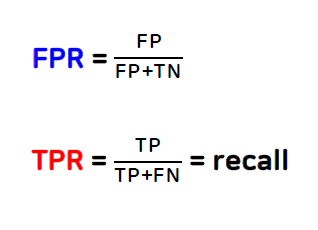



-